In [1]:
# Group 19. BUS 4023 - SPRING/SUMMER 2020. Final Assignment. Customer Segmentation. Aug. 14, 2020.

# In this cell we load the relevant modules required for this notebook.

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [2]:
# Load the data file.
BathSoapHousehold_df = pd.read_csv('BathSoapHousehold.csv')

In [3]:
# Visually inspect the data file.
#print(BathSoapHousehold_df)
BathSoapHousehold_df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [4]:
# Visually inspect the names of the variables
BathSoapHousehold_df.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')

In [5]:
# Remove special characters from the variable name.
# This is part of the data cleaning process, where the names of the variables are renamed to make them easier to reference.

BathSoapHousehold_df.columns = [s.strip().replace(' / ', '_') for s in BathSoapHousehold_df.columns]
BathSoapHousehold_df.columns = [s.strip().replace(' - ', '_') for s in BathSoapHousehold_df.columns]
BathSoapHousehold_df.columns = [s.strip().replace('/', '_') for s in BathSoapHousehold_df.columns]
BathSoapHousehold_df.columns = [s.strip().replace('. ', '_') for s in BathSoapHousehold_df.columns]
BathSoapHousehold_df.columns = [s.strip().replace('  ', '_') for s in BathSoapHousehold_df.columns]
BathSoapHousehold_df.columns = [s.strip().replace(' ', '_') for s in BathSoapHousehold_df.columns]
BathSoapHousehold_df.columns = [s.strip().replace('_%', '') for s in BathSoapHousehold_df.columns]

In [6]:
# We check the variable name after clearing the special characters from the variable name

BathSoapHousehold_df.columns

Index(['Member_id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index', 'No_of_Brands', 'Brand_Runs', 'Total_Volume',
       'No_of_Trans', 'Value', 'Trans_Brand_Runs', 'Vol_Tran', 'Avg_Price',
       'Pur_Vol_No_Promo', 'Pur_Vol_Promo_6', 'Pur_Vol_Other_Promo',
       'Br_Cd_57,_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24',
       'Br_Cd_481', 'Br_Cd_352', 'Br_Cd_5', 'Others_999', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15'],
      dtype='object')

In [7]:
# Data cleaning: Out of range value correction. We used the "filter" feature of Excel to see any out-of-bound
# or missing values for the various variables. Theose with out-of-bound or missing values will be corrected
# by replacing it with a median value.

# For gender, there are two possible values, (1 = male, 2 =female). We noticed that 0 is also present for several of
# of the records.
median_gender = BathSoapHousehold_df['SEX'].median()
BathSoapHousehold_df['SEX']=BathSoapHousehold_df['SEX'].replace(0, median_gender)

# For Education (EDU), the range of values are 1 to 9 (inclusive). The value of zero is replaced with the median value.
median_EDU = BathSoapHousehold_df['EDU'].median()
BathSoapHousehold_df['EDU']=BathSoapHousehold_df['EDU'].replace(0, median_EDU)

# Television availability (1 = available, 2 = unavailable). The zero value is replaced with the median value.
median_TV = BathSoapHousehold_df['CS'].median()
BathSoapHousehold_df['CS']=BathSoapHousehold_df['CS'].replace(0, median_TV)

In [8]:
#https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas

# In this cell we convert numeric varirables as float so that the numerical values are not treated as categorical
# data later when we apply dummy_variable creation function.

numeric_pred =['AGE', 'HS', 'Affluence_Index', 'No_of_Brands', 'Brand_Runs', 'Total_Volume',
       'No_of_Trans', 'Value', 'Trans_Brand_Runs', 'Vol_Tran', 'Avg_Price',
       'Pur_Vol_No_Promo', 'Pur_Vol_Promo_6', 'Pur_Vol_Other_Promo',
       'Br_Cd_57,_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24',
       'Br_Cd_481', 'Br_Cd_352', 'Br_Cd_5', 'Others_999', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15']
    
BathSoapHousehold_df[numeric_pred] = BathSoapHousehold_df[numeric_pred].apply(pd.to_numeric)

#ORDINAL categorical data:
ordinal_pred = ['SEC', 'EDU', 'CHILD']

BathSoapHousehold_df[ordinal_pred] = BathSoapHousehold_df[ordinal_pred].apply(pd.to_numeric)

In [9]:
#df = df.astype(str)

# In this cell we ensure that the NOMINAL categorical data are treated as string values so that only these are
# later converted as dummy variables.

# Member ID provides no useful information and would be later dropped from the list.

nominal_cat = ['FEH', 'MT', 'SEX', 'CS']
BathSoapHousehold_df[nominal_cat] = BathSoapHousehold_df[nominal_cat].astype(str) 

In [10]:
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

# VARIABLE REDUCTION.
# The columns "Percent of volume purchased under promotion code 6" and "Percent of volume purchased under 
# other promotions" provide the same information. We will merge these two variables in to a single variable (derived variable),
# and drop these original variable (source variable).

BathSoapHousehold_df['Pur_Vol_Promo'] = BathSoapHousehold_df['Pur_Vol_Promo_6'] + BathSoapHousehold_df['Pur_Vol_Other_Promo']

In [11]:
# Variable REDUCTION
# Now based on our preliminary variable analysis, we can drop those variables from the pandas data frame.

d_col = ['Pur_Vol_Promo_6', 'Pur_Vol_Other_Promo', 'Member_id'] # d_col means columns which will be dropped.
BathSoapHousehold_df = BathSoapHousehold_df.drop(d_col, axis=1)

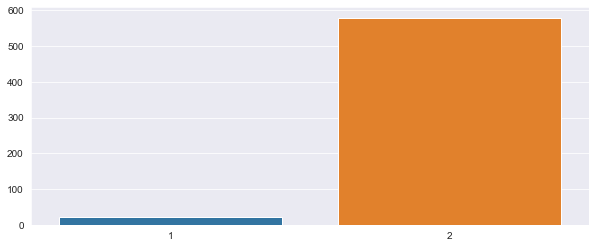

In [12]:
# DATA EXPLORATION - AND - DATA REDUCTION
# Now before converting the NOMINAL categorical data into dummy variable, we would like to see how much variance there
# in the variable data. If the variance is close to zero, then we will drop this variable.

genders = BathSoapHousehold_df.SEX.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

<B>Data Reduction</B><br>
It can be seen from the above bar chart of gender, that there is not significant variability in the data after 
data cleaning this variable.
The bar chart is heavily skewed, hence we will drop this variable from further analysis.

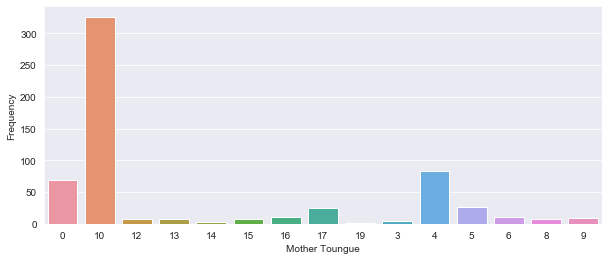

In [13]:
# Purpose: Data Exploration and Data Reduction.
# We now evaluate the mother language variable MT. 

mother_lang = BathSoapHousehold_df.MT.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=mother_lang.index, y=mother_lang.values)
plt.xlabel('Mother Toungue')
plt.ylabel('Frequency')
plt.show()

<B>Data Binning</B><br>
It can seen from the Mother Language bar chart that approx. 70% of mother language are represented by 2 languages (4 & 10).<br>
Given this, we will group all languages (except 4 and 10) into one single bin which we will call "Other", and label it as 1.<br>
<br>
A major advantage of data binning is that it will minimize the number of variables after dummy variables are created.

In [14]:
#In this cell we bin all the other languages into a single "Other" language.

# includes all the index of MT except 10 and 4.
lang_index=['0', '12', '13', '14', '15', '16', '17', '19', '3', '5', '6', '8', '9'] 

for i in lang_index:
    BathSoapHousehold_df['MT']=BathSoapHousehold_df['MT'].replace(i, '1')

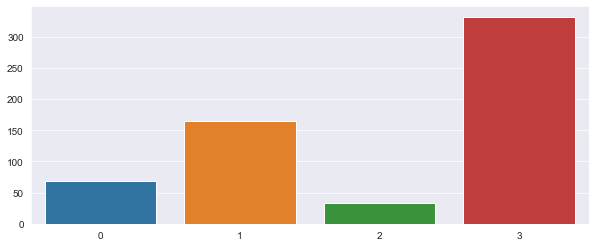

In [15]:
# Purpose: Data Exploration and Data Reduction.
# We now evaluate the Eating Habit variable MT. 

eat_habit = BathSoapHousehold_df.FEH.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=eat_habit.index, y=eat_habit.values)
plt.show()

<b>Data Binning</b><br>
As 1 and 2 both represents vegetarian, and considering that number of records in with FEH label equal to 2 is in very small number, we merge 2 with 1.<br>
Note, both of these categrical classes are near-similar.

In [16]:
# Merging the two vegetarian classes.
BathSoapHousehold_df.FEH=BathSoapHousehold_df.FEH.replace("2", "1")

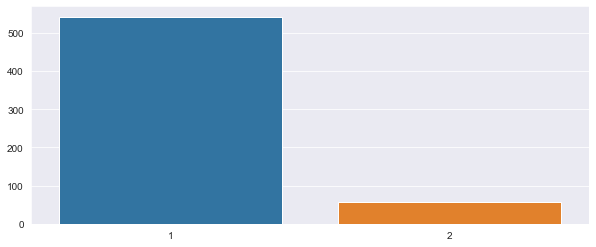

In [17]:
# Purpose: Data Exploration and Data Reduction.
# We now evaluate the Television availability variable CS. 

tv_avl = BathSoapHousehold_df.CS.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=tv_avl.index, y=tv_avl.values)
plt.show()

<B>Data Reduction</B><br>
It can be seen from the above bar chart of gender, that there is not significant variability in the data after 
data cleaning this variable.
The bar chart is heavily skewed, hence we will drop this variable (CS) from further analysis.

In [18]:
# Variable REDUCTION
# Now based on our analysis of the bar chrt of the NOMINAL categorical data we drop CS, and SEX.

d_col = ['CS', 'SEX'] # d_col means columns which will be dropped.
BathSoapHousehold_df = BathSoapHousehold_df.drop(d_col, axis=1)

<B>Variable Reduction (LINEAR DEPENDENCE)</B><br>
We then go over the variable descriptors to remove any linearly dependent variable. A variable in the data-set is linearly
dependent if it can be derived from some linear combination of other variable. The following two variables are linearly dependent on other variables and will be dropped.<br><br>
<li> Trans/Brand Runs - Average transactions per brand run. It is given by dividing 'No. of Trans' with 'Brand Runs'
<li> Vol/Trans - Average volume per transaction. It is given by dividing 'Total Volume' with 'No. of Trans'.
<br><br>
Hence we will drop these two variables.

In [19]:
d_col = ['Trans_Brand_Runs', 'Vol_Tran'] # d_col means columns which will be dropped.
BathSoapHousehold_df = BathSoapHousehold_df.drop(d_col, axis=1)

In [20]:
# DATA INTEGRITY. We now verify whether there are any missing values for any of the source variable.

pd.DataFrame({
'missing value': BathSoapHousehold_df.isnull().sum(),
})

,missing value
SEC,0
FEH,0
MT,0
AGE,0
EDU,0
HS,0
CHILD,0
Affluence_Index,0
No_of_Brands,0
Brand_Runs,0


In [21]:
# Data Exploration of all the variables.
BathSoapHousehold_df.describe()

,SEC,AGE,EDU,HS,CHILD,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of_Trans,...,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Pur_Vol_Promo
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.500000,3.213333,4.590833,4.191667,3.233333,17.02000,3.636667,15.751667,11914.770000,31.153333,...,0.096909,0.080148,0.030806,0.020248,0.029367,0.006217,0.024938,0.136481,0.025398,0.086992
std,1.118967,0.865489,1.590246,2.300090,1.217110,11.41008,1.579709,10.396481,7770.374508,17.427258,...,0.195760,0.152564,0.062816,0.076657,0.098467,0.026312,0.095448,0.266045,0.087592,0.119490
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,150.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,3.000000,4.000000,3.000000,2.000000,10.00000,2.000000,8.000000,6825.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,3.000000,4.750000,4.000000,4.000000,15.00000,3.000000,15.000000,10360.000000,28.000000,...,0.012601,0.007750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046532
75%,3.250000,4.000000,5.000000,5.000000,4.000000,24.00000,5.000000,21.000000,15343.750000,40.000000,...,0.082935,0.086341,0.031645,0.000000,0.007739,0.000000,0.005522,0.118416,0.000000,0.121437
max,4.000000,4.000000,9.000000,15.000000,5.000000,53.00000,9.000000,74.000000,50895.000000,138.000000,...,1.000000,0.963636,0.407643,1.000000,0.897507,0.333333,1.000000,1.000000,0.840194,1.000000


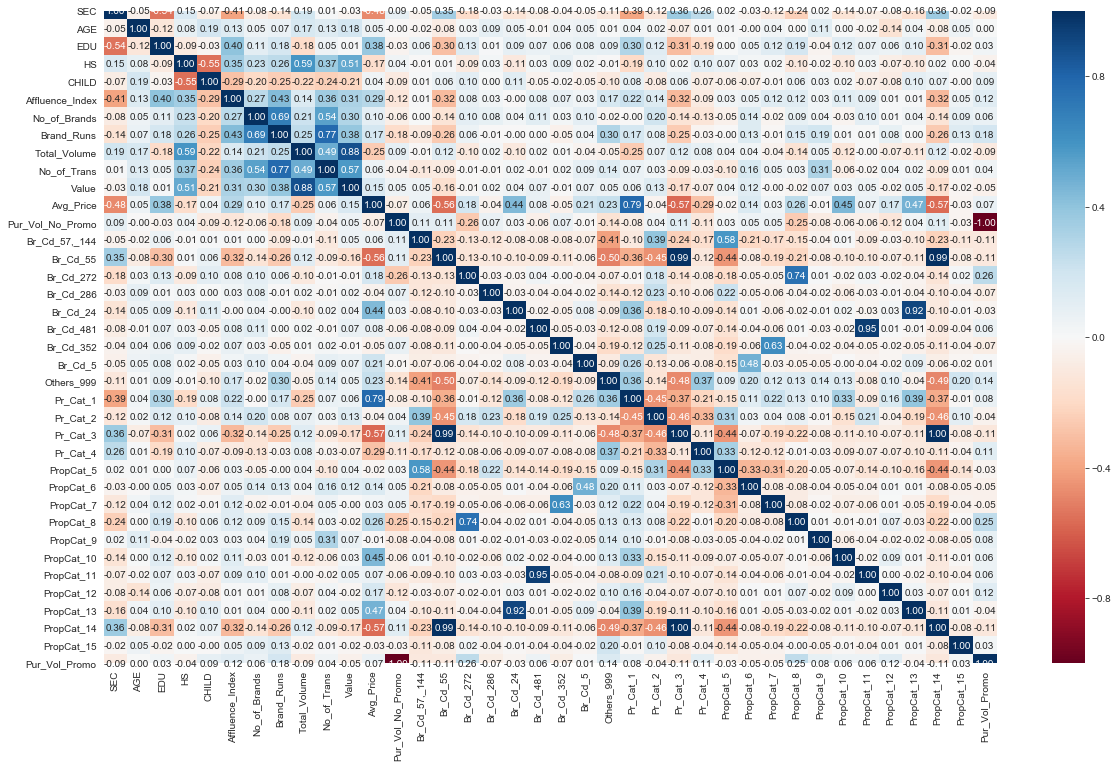

In [22]:
# We look at correlation between various variables and drop those variables which are strongly correlated.
# Since for two varibles which are strongly correlated, one of the variable can be dropped, as the information contained
# in the dropped variable is contained in the correlated variable which is not dropped.
# Pge 148

## simple heatmap of correlations. Nominal Cat. variable is excluded by Python.
corr = BathSoapHousehold_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

<b> Variable reduction based on Correlation</b><br>
We Variation in one variable that is duplicated by similar variation in the other variable. We can use his fact to remove 
some of the variables. Based on the above heat map, the pairs with correlation |r|>=0.85 are:

<li>Value - Total_Volume: 0.88
<li>Pr_Cat_3 - Br_Cd_55: 0.99
<li>Pur_Vol_Promo - Pur_Vol_No_Promo: -1
<li>PropCat_11 - Br_Cd_481: 0.95
<li>PropCat_14 - Br_Cd_24: 0.92
<li>PropCat_14 -  Br_Cd_55: 0.99
<li>PropCat_14 - Pr_Cat_3: 1.00
<br><br>
Based on this we will now drop "Value", "Br_Cd_55", "Pur_Vol_No_Promo", "Br_Cd_481", "Br_Cd_24", "Br_Cd_55", "Pr_Cat_3"    

In [23]:
# VARIABLE REDUCTION.
# In this cell we now remove those variables which are already correlated.
# d_col means columns which will be dropped.

d_col = ["Value", "Br_Cd_55", "Pur_Vol_No_Promo", "Br_Cd_481", "Br_Cd_24", "Br_Cd_55", "Pr_Cat_3"] 
BathSoapHousehold_df = BathSoapHousehold_df.drop(d_col, axis=1)

In [24]:
BathSoapHousehold_df.columns

Index(['SEC', 'FEH', 'MT', 'AGE', 'EDU', 'HS', 'CHILD', 'Affluence_Index',
       'No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of_Trans',
       'Avg_Price', 'Br_Cd_57,_144', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_352',
       'Br_Cd_5', 'Others_999', 'Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15', 'Pur_Vol_Promo'],
      dtype='object')

In [25]:
# DATA NORMALIZATION. Nominal Categorical data will not be normalized.
# Now we will evaluate the performance of our variable selection using the PCA. 
# It would be useful for this stage and later stages to normalize the data in the [0,1] interval.
# We now evaluate which variables are not in the [0,1], and then normalize that variables.

# PCA does not runs on nominal categrical data.

norm_pred = ['SEC', 'AGE', 'EDU', 'HS', 'CHILD', 'Affluence_Index', 
             'No_of_Trans','No_of_Brands', 'Brand_Runs', 'Total_Volume', 'Avg_Price']

min_max_scaler = preprocessing.MinMaxScaler()
BathSoapHousehold_df[norm_pred] = min_max_scaler.fit_transform(BathSoapHousehold_df[norm_pred])

In [26]:
# Validating the data normaliation process
# we print the range of the data to ensure that the range of the data is in the [0,1] interval
# except nominal categorical data.

pd.DataFrame({'mean': BathSoapHousehold_df.mean(),
'min': BathSoapHousehold_df.min(),
'max': BathSoapHousehold_df.max(),

})

,mean,min,max
SEC,0.500000,0.0,1.000000
FEH,inf,0.0,3.000000
MT,inf,1.0,4.000000
AGE,0.737778,0.0,1.000000
EDU,0.448854,0.0,1.000000
HS,0.279444,0.0,1.000000
CHILD,0.558333,0.0,1.000000
Affluence_Index,0.321132,0.0,1.000000
No_of_Brands,0.329583,0.0,1.000000
Brand_Runs,0.202078,0.0,1.000000


In [27]:
# We perform Principal Component Analysis (PCA) on the numerical data. (page 152)
nominal_pred = ['SEC', 'FEH', 'MT'] # to exclude the nominal cat. predictors.

from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(BathSoapHousehold_df.drop(nominal_pred, axis=1))


PCA()

In [28]:
import numpy as np

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pd.set_option('display.max_columns', None)
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
Standard deviation,0.440836,0.423728,0.353724,0.333619,0.303070,0.279624,0.227822,0.199980,0.194174,0.175063,0.153973,0.150928,0.143464,0.134069,0.117384,0.108876,0.099379,0.094119,0.087772,0.082591,0.080312,0.074638,0.062260,0.060206,0.051420,0.046410,0.034887,0.025919,0.018226,0.009524,1.821199e-10
Proportion of variance,0.174895,0.161584,0.112604,0.100167,0.082663,0.070367,0.046711,0.035991,0.033932,0.027581,0.021336,0.020501,0.018523,0.016176,0.012401,0.010668,0.008888,0.007972,0.006933,0.006139,0.005805,0.005014,0.003489,0.003262,0.002380,0.001938,0.001095,0.000605,0.000299,0.000082,2.984960e-20
Cumulative proportion,0.174895,0.336479,0.449083,0.549250,0.631913,0.702281,0.748991,0.784983,0.818914,0.846496,0.867831,0.888332,0.906855,0.923031,0.935432,0.946100,0.954988,0.962960,0.969893,0.976032,0.981837,0.986851,0.990339,0.993601,0.995981,0.997919,0.999015,0.999619,0.999918,1.000000,1.000000e+00


<b>PCA RESULT DISCUSSION</b><br>
It can be seen from the table above that the use of PCA does not significantly reduces the number of variables. For instance to maintain >90% variance in the data, we need to use >=13 PCA. Hence as this does not lead to any significant reduction in the number of variables, we do not further use PCA for the simplicity of analysis.

In [29]:
# Dummy variables creation.
# Now we convert all the categorical data into dummy variable.
BathSoapHousehold_df = pd.get_dummies(BathSoapHousehold_df, prefix_sep='_', drop_first=False)

In [30]:
# Now we can visually inspect to see the new dummy variables.

# It is interesting to note that we have 6 binary dummy variables due to reduction applied earlier.

BathSoapHousehold_df.head()

,SEC,AGE,EDU,HS,CHILD,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of_Trans,Avg_Price,"Br_Cd_57,_144",Br_Cd_272,Br_Cd_286,Br_Cd_352,Br_Cd_5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Pur_Vol_Promo,FEH_0,FEH_1,FEH_3,MT_1,MT_10,MT_4
0,1.000000,1.000000,0.3750,0.133333,0.75,0.037736,0.250,0.219178,0.155188,0.167883,0.164922,0.376947,0.0,0.000000,0.0,0.000000,0.492212,0.233645,0.560748,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.000000,0,0,1,0,1,0
1,0.666667,0.333333,0.3750,0.266667,0.25,0.358491,0.500,0.328767,0.272441,0.284672,0.231324,0.021467,0.0,0.000000,0.0,0.144902,0.699463,0.293381,0.547406,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.112701,0,1,0,0,1,0
2,0.333333,1.000000,0.5000,0.400000,0.75,0.433962,0.500,0.493151,0.452261,0.452555,0.101768,0.025974,0.0,0.030303,0.0,0.019481,0.378788,0.120130,0.318182,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.058442,0,0,1,0,1,0
3,1.000000,1.000000,0.4375,0.000000,1.00,0.000000,0.125,0.041096,0.026604,0.021898,0.071454,0.400000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.000000,1,0,0,1,0,0
4,1.000000,0.666667,0.3750,0.266667,0.50,0.188679,0.250,0.068493,0.160607,0.087591,0.054132,0.048193,0.0,0.000000,0.0,0.000000,0.807229,0.000000,0.048193,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.385542,0,1,0,0,1,0


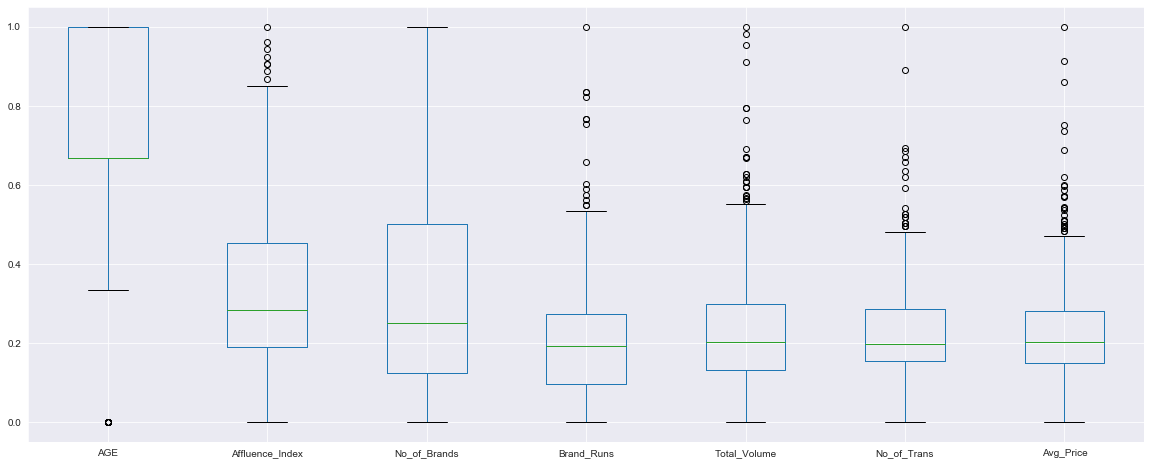

In [31]:
# DATA EXPLORATION of numerical value by using box plots. We can also see outliers in the data.

numeric_pred=['AGE', 'Affluence_Index', 'No_of_Brands',
       'Brand_Runs', 'Total_Volume', 'No_of_Trans', 'Avg_Price']

BathSoapHousehold_df[numeric_pred].plot(kind='box', figsize=(20, 8))

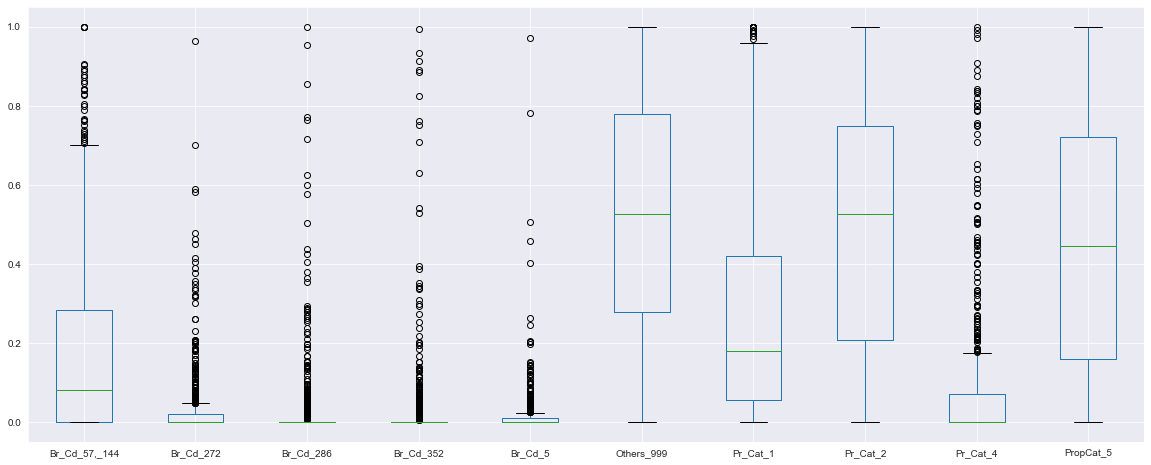

In [32]:
# DATA EXPLORATION of numerical value by using box plots

numeric_pred=['Br_Cd_57,_144', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_352', 'Br_Cd_5',
       'Others_999', 'Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_4', 'PropCat_5']
BathSoapHousehold_df[numeric_pred].plot(kind='box', figsize=(20, 8))

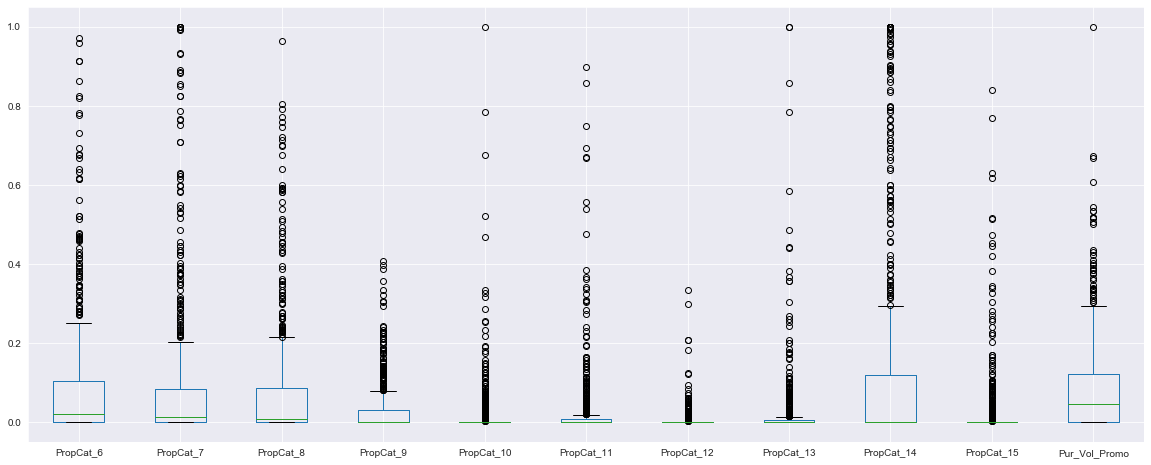

In [33]:
# DATA EXPLORATION of numerical value by using box plots

numeric_pred=['PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10',
       'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15', 'Pur_Vol_Promo']
BathSoapHousehold_df[numeric_pred].plot(kind='box', figsize=(20, 8))

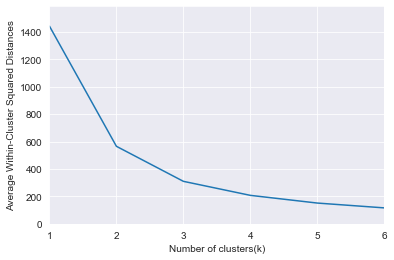

In [34]:
# After the relevant data cleaning, and data reduction, we can now start applying our clustering scheme.
# There are various clustering algorithm, for our analysis we choose the KNN algorithm.

# NUMBER OF CLUSTER: ELBOW GRAPH. An important aspect of the clustering algorithm to decide what would be the suitable
# value of k, i.e. the number of cluster. This information is obtained from the elbow diagram.
# The value of k=3 is selected to be the one where the curve starts bending.

# Analyzing the suitable number of clusters. 


inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(BathSoapHousehold_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
#plot.figure(figsize=(20, 6))
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [35]:
# Based on the elbow graph result, the number of cluster which we use is 3.
kmeans = KMeans(n_clusters=3, random_state=0).fit(BathSoapHousehold_df)

In [36]:
#DELETE THIS LATER

#centroids = pd.DataFrame(kmeans.cluster_centers_, columns=BathSoapHousehold_df.columns)
#pd.set_option('precision', 3)
#print(centroids)
#pd.set_option('precision', 3)

In [37]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(BathSoapHousehold_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=BathSoapHousehold_df.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (148 members): 286.33 within cluster 
Cluster 1 (196 members): 346.25 within cluster 
Cluster 2 (256 members): 296.80 within cluster 


In [38]:
df

,squaredDistance,cluster
0,0.603460,2
1,1.215220,1
2,0.721016,2
3,1.844391,0
4,2.420861,1
...,...,...
595,1.701317,2
596,0.629572,2
597,1.092053,0
598,1.022630,1


In [39]:
# outputs the centroids corrdinates for the three clusters.
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=BathSoapHousehold_df.columns)

centroids

,SEC,AGE,EDU,HS,CHILD,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of_Trans,Avg_Price,"Br_Cd_57,_144",Br_Cd_272,Br_Cd_286,Br_Cd_352,Br_Cd_5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Pur_Vol_Promo,FEH_0,FEH_1,FEH_3,MT_1,MT_10,MT_4
0,0.479730,0.650901,0.431166,0.179279,0.722973,0.193014,0.260135,0.152999,0.202322,0.168870,0.228798,0.183179,0.033284,0.025384,0.012741,0.014657,0.520185,0.310927,0.427213,0.094454,0.443604,0.089240,0.087616,0.082252,0.024605,0.022751,0.015303,0.008946,0.046010,0.166643,0.013030,0.081910,4.662162e-01,2.027027e-02,5.135135e-01,1.000000e+00,-1.110223e-16,-1.110223e-16
1,0.346939,0.789116,0.510204,0.309184,0.516582,0.413458,0.350128,0.221764,0.222319,0.225235,0.252410,0.206749,0.043866,0.041224,0.045501,0.021773,0.538668,0.310124,0.554624,0.067386,0.493422,0.080879,0.119221,0.097443,0.028694,0.023515,0.027406,0.005258,0.020809,0.066321,0.037031,0.103259,-1.665335e-16,1.000000e+00,-5.551115e-16,2.193878e-01,3.775510e-01,4.030612e-01
2,0.628906,0.748698,0.412109,0.314583,0.495117,0.324514,0.354004,0.215379,0.256197,0.245780,0.200124,0.166640,0.024881,0.033329,0.038028,0.017481,0.510269,0.236799,0.484185,0.101498,0.437243,0.102868,0.085199,0.065691,0.036007,0.016301,0.039000,0.005373,0.015916,0.172759,0.023642,0.077475,-1.665335e-16,3.330669e-16,1.000000e+00,-8.881784e-16,9.843750e-01,1.562500e-02


In [42]:
# The variables for which there is high variance
var_variance =['SEC', 'EDU', 'Affluence_Index', 'Br_Cd_57,_144', 'Br_Cd_272', 'Br_Cd_286', 'Pr_Cat_2', 
              'Pr_Cat_4', 'PropCat_7',  'PropCat_14', 'PropCat_15', 'FEH_1', 'FEH_3']

In [43]:
centroids[var_variance]

,SEC,EDU,Affluence_Index,"Br_Cd_57,_144",Br_Cd_272,Br_Cd_286,Pr_Cat_2,Pr_Cat_4,PropCat_7,PropCat_14,PropCat_15,FEH_1,FEH_3
0,0.479730,0.431166,0.193014,0.183179,0.033284,0.025384,0.427213,0.094454,0.087616,0.166643,0.013030,2.027027e-02,5.135135e-01
1,0.346939,0.510204,0.413458,0.206749,0.043866,0.041224,0.554624,0.067386,0.119221,0.066321,0.037031,1.000000e+00,-5.551115e-16
2,0.628906,0.412109,0.324514,0.166640,0.024881,0.033329,0.484185,0.101498,0.085199,0.172759,0.023642,3.330669e-16,1.000000e+00


(-0.5, 7.5)

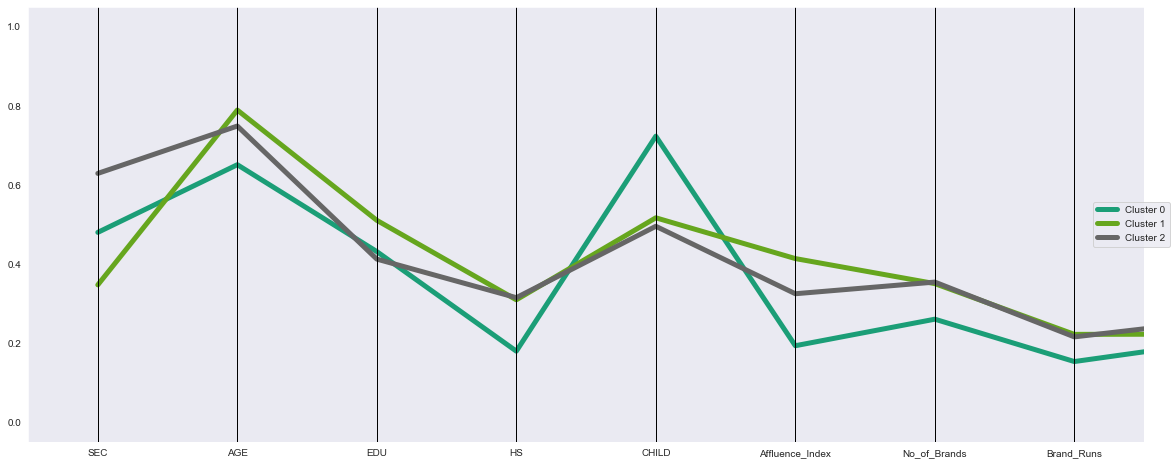

In [47]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(20,8))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [48]:
BathSoapHousehold_df.groupby(kmeans.labels_).mean()

,SEC,AGE,EDU,HS,CHILD,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of_Trans,Avg_Price,"Br_Cd_57,_144",Br_Cd_272,Br_Cd_286,Br_Cd_352,Br_Cd_5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Pur_Vol_Promo,FEH_0,FEH_1,FEH_3,MT_1,MT_10,MT_4
0,0.479730,0.650901,0.431166,0.179279,0.722973,0.193014,0.260135,0.152999,0.202322,0.168870,0.228798,0.183179,0.033284,0.025384,0.012741,0.014657,0.520185,0.310927,0.427213,0.094454,0.443604,0.089240,0.087616,0.082252,0.024605,0.022751,0.015303,0.008946,0.046010,0.166643,0.013030,0.081910,0.466216,0.02027,0.513514,1.000000,0.000000,0.000000
1,0.346939,0.789116,0.510204,0.309184,0.516582,0.413458,0.350128,0.221764,0.222319,0.225235,0.252410,0.206749,0.043866,0.041224,0.045501,0.021773,0.538668,0.310124,0.554624,0.067386,0.493422,0.080879,0.119221,0.097443,0.028694,0.023515,0.027406,0.005258,0.020809,0.066321,0.037031,0.103259,0.000000,1.00000,0.000000,0.219388,0.377551,0.403061
2,0.628906,0.748698,0.412109,0.314583,0.495117,0.324514,0.354004,0.215379,0.256197,0.245780,0.200124,0.166640,0.024881,0.033329,0.038028,0.017481,0.510269,0.236799,0.484185,0.101498,0.437243,0.102868,0.085199,0.065691,0.036007,0.016301,0.039000,0.005373,0.015916,0.172759,0.023642,0.077475,0.000000,0.00000,1.000000,0.000000,0.984375,0.015625


In [49]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2
0  0.000000  1.599480  1.605611
1  1.599480  0.000000  1.643974
2  1.605611  1.643974  0.000000


********************
<b>Q # 2</b> DEVELOP A PREDICTIVE MODEL TO CLASSIFY CLIENTS AS VALUE CONSCIOUS OR NOT. BINARY LOGISTIC MODEL.
<br>
<br>
<b>SOLUTION: Value consciousness</b>  means that consumers pay more attention to deals and special offers and are prepared to buy in bulk to secure discounts. <br><br>This information an be gauged from "Purchase within promotion" variable type. It can be seen from cluster analysis that cluster number 0 and 2 have low value for "Pur_Vol_Promo", i.e. consumers in these two clusters tend to buy less under promotion. Whereas customers in cluster 1 tend to buy more under promotion, hence cluster 1 would be assigned a class of "1", and cluster 0 & 2 will be assigned class of "0".
********************

In [50]:
# We create a new variable in the data frame for the class, and assign the class value 0/1 based on which cluster it belongs to.
BathSoapHousehold_df['class']=df.cluster.replace(2, 0)

BathSoapHousehold_df['class']

0      0
1      1
2      0
3      0
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: class, Length: 600, dtype: int32

In [51]:
# Import relevant modules to perform classification using logistic regression.

from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression #Logistic Regression

no display found. Using non-interactive Agg backend


In [52]:
# Partition the data columns into predictors and outcome.
X=BathSoapHousehold_df.drop('class', axis=1)
y=BathSoapHousehold_df['class']

In [53]:
# Partition the data into training and validation data.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [54]:
# This cell trains Logistic Regression and outputs the accuracy. 
# No changes need to be made in this cell.

logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
predict = logit_reg.predict(valid_X)
print('Class 0 represents NOT class-consciousness, whereas 1 means they are class-conscious')
classificationSummary(valid_y, logit_reg.predict(valid_X))

Class 0 represents NOT class-consciousness, whereas 1 means they are class-conscious
Confusion Matrix (Accuracy 0.9958)

       Prediction
Actual   0   1
     0 165   0
     1   1  74


In [55]:
pred_v = pd.Series(logit_reg.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)

Text(0, 0.5, 'Lift')

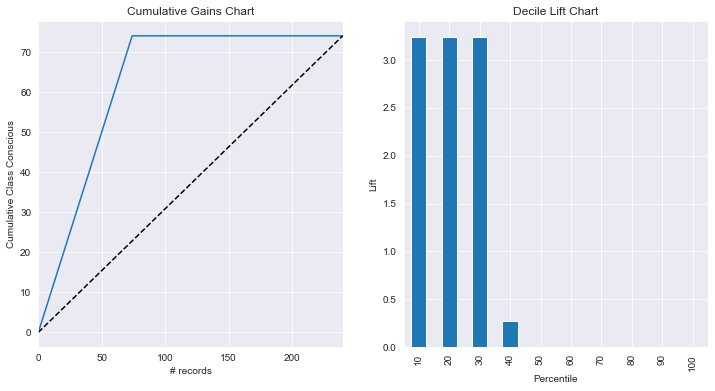

In [56]:
# We plot the cumulative and decile lift chart for analysis of the profit

from dmba import liftChart, gainsChart

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Class Conscious')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

Text(0, 0.5, 'PropCat_14')

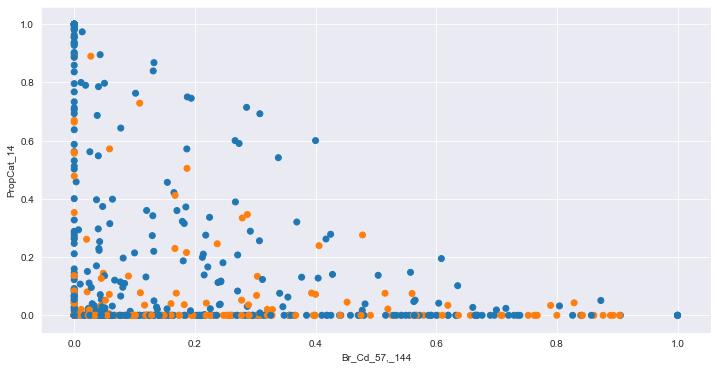

In [57]:
# This plot is an example of how a scatter plot can be plotted for two different variables, with the markers marked
# differently.

plt.figure(figsize=(12, 6))
xaxis=BathSoapHousehold_df['Br_Cd_57,_144']
yaxis=BathSoapHousehold_df['PropCat_14']
plt.scatter(x=xaxis, y=yaxis,  
            color=['C0' if p==0 else 'C1' for p in BathSoapHousehold_df['class']], label='Class Conscious')
plt.xlabel('Br_Cd_57,_144')
plt.ylabel('PropCat_14')

The End !